<a href="https://colab.research.google.com/github/Ommanchanda/Machine_Learning/blob/main/Support_Vector_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=2,n_redundant=0)

In [10]:
pd.DataFrame(x)

,0,1
0,-1.184254,0.092734
1,-1.228932,-0.454799
2,-1.460533,1.136097
3,-1.192276,0.946114
4,0.856112,-1.023092
...,...,...
995,-1.195129,-0.342448
996,-0.298502,0.410332
997,-0.555820,-2.232416
998,0.853492,0.729539


In [8]:
y

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

<Axes: xlabel='0', ylabel='1'>

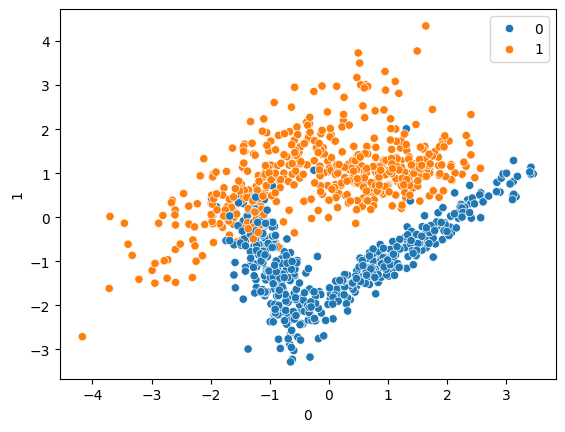

In [11]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [15]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
clf.coef_

array([[-0.71301048,  2.28948179]])

In [17]:
y_pred=clf.predict(x_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       150
           1       0.89      0.94      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [21]:
confusion_matrix(y_test,y_pred)

array([[132,  18],
       [  9, 141]])

In [22]:
from sklearn.model_selection import GridSearchCV

params={'C':[0.1,0.2,1,2,3,10,50,100],
        'gamma' : [1,0.1,0.2,0.001,0.003],
        'kernel' : ['linear']}

In [23]:
grid=GridSearchCV(SVC(),param_grid=params,cv=5,verbose=3)

In [24]:
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [25]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.943 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.886 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.921 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.943 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.886 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.929 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.2, kernel=linear;, score=0.886 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.2, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [29]:
grid.best_score_

np.float64(0.9128571428571428)

In [31]:
y_pred1=grid.predict(x_test)

In [33]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       150
           1       0.87      0.95      0.91       150

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



In [34]:
print(confusion_matrix(y_test,y_pred1))

[[129  21]
 [  8 142]]
